<a href="https://colab.research.google.com/github/jiyun126/-/blob/main/2021142033_%ED%95%9C%EC%A7%80%EC%9C%A4_13%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from math import log2
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
df = pd.read_csv("/content/drive/MyDrive/machine learning/drug200.csv")

In [5]:
label_maps = {
    'Sex': {'F': 2, 'M': 1},
    'BP': {'HIGH': 2, 'LOW': 1, 'NORMAL': 0},
    'Cholesterol': {'HIGH': 2, 'LOW': 1, 'NORMAL': 0},
    'Drug': {'drugA': 1, 'drugB': 2, 'drugC': 3, 'drugX': 4, 'drugY': 5}
}
for col, mapping in label_maps.items():
    df[col] = df[col].replace(mapping)


<ipython-input-5-bbe1a9e7eb0c>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(mapping)


In [6]:
def entropy(y):
    _, counts = np.unique(y, return_counts=True)
    prob = counts / counts.sum()
    return -np.sum(prob * np.log2(prob))

In [8]:
def info_gain(data, feature, target='Drug'):
    total_entropy = entropy(data[target])
    values = data[feature].unique()

    weighted_entropy = 0
    for val in values:
        subset = data[data[feature] == val]
        weight = len(subset) / len(data)
        weighted_entropy += weight * entropy(subset[target])

    return total_entropy - weighted_entropy

In [9]:
print("[1번] Root Node 후보들의 정보 이득")
features = ['Sex', 'BP', 'Cholesterol']
for f in features:
    gain = info_gain(df, f)
    print(f"{f}의 정보 이득: {gain:.4f}")

[1번] Root Node 후보들의 정보 이득
Sex의 정보 이득: 0.0077
BP의 정보 이득: 0.6201
Cholesterol의 정보 이득: 0.0931



[2번] scikit-learn을 사용한 트리 학습 및 시각화


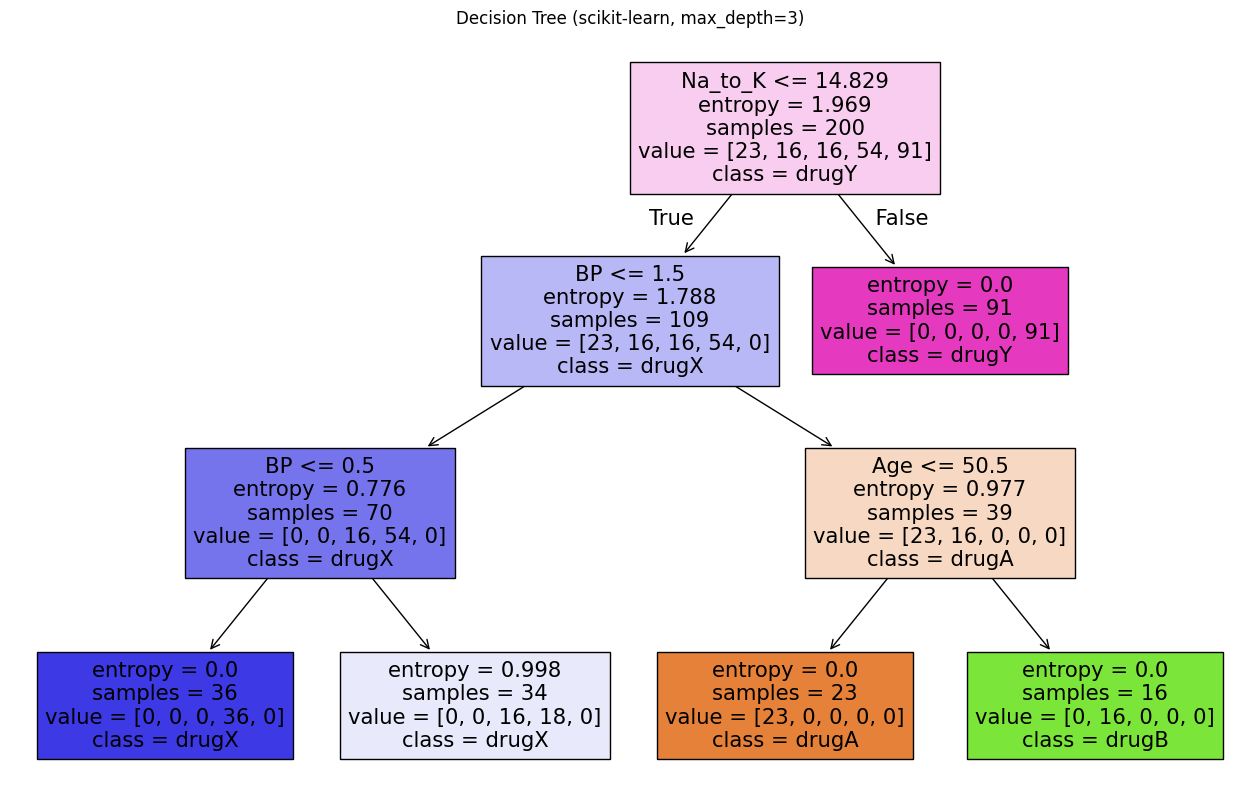

In [10]:
print("\n[2번] scikit-learn을 사용한 트리 학습 및 시각화")
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = df['Drug']

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf.fit(X, y)

plt.figure(figsize=(16, 10))
plot_tree(clf, feature_names=X.columns, class_names=['drugA','drugB','drugC','drugX','drugY'], filled=True)
plt.title("Decision Tree (scikit-learn, max_depth=3)")
plt.show()
